# Linear Regression

Build the linear regression model using scikit learn in boston data to predict 'MEDV' based on other dependent variable.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# import scipy.stats as stats
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
#from sklearn.datasets import load_boston

## Import Dataset

In [2]:
boston = pd.read_excel("Boston.xlsx", header=None, sheet_name="Sheet3")
boston

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
boston.rename(columns={0: "CRIM", 1: "ZN", 2: "INDUS", 3: "CHAS", 4: "NOX", 5: "RM", 
                          6: "AGE", 7: "DIS", 8: "RAD", 9: "TAX", 10: "PTRATIO", 11: "B", 
                          12: "LSTAT", 13: "MEDV"}, inplace=True)
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Variables in order:
1. CRIM:     per capita crime rate by town
2. ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS:    proportion of non-retail business acres per town
4. CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX:      nitric oxides concentration (parts per 10 million)
6. RM:       average number of rooms per dwelling
7. AGE:      proportion of owner-occupied units built prior to 1940
8. DIS:      weighted distances to five Boston employment centres
9. RAD:      index of accessibility to radial highways
10. TAX:      full-value property-tax rate per 10,000 USD
11. PTRATIO:  pupil-teacher ratio by town
12. B:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT:    % lower status of the population
14. MEDV:     Median value of owner-occupied homes in 1000's of USD

In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# no duplicates
boston.duplicated().sum()

0

# EDA

In [6]:
corr_ = boston.corr()
corr_

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


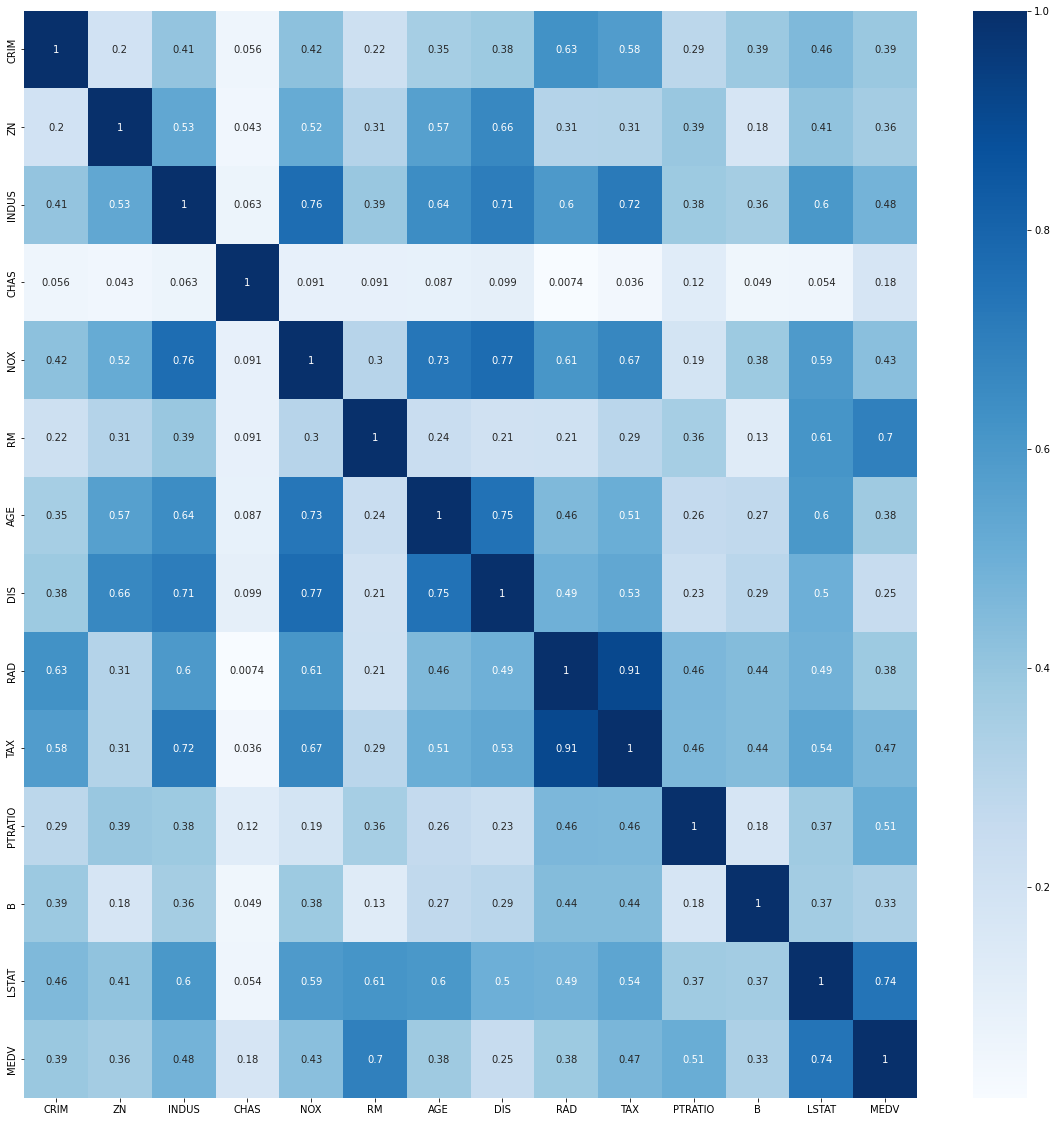

In [7]:
#absolute value of corr (for ranking purposes)
plt.figure(figsize=(20, 20))
sns.heatmap(abs(corr_), annot=True, cmap="Blues", fmt='.2g')
plt.show()

In [8]:
#ranked (absolute value) correlations of independent vars to MEDV (target var)
df_corr_ranked = abs(corr_['MEDV']).rank()
df_corr_ranked

CRIM        7.0
ZN          4.0
INDUS      10.0
CHAS        1.0
NOX         8.0
RM         12.0
AGE         5.0
DIS         2.0
RAD         6.0
TAX         9.0
PTRATIO    11.0
B           3.0
LSTAT      13.0
MEDV       14.0
Name: MEDV, dtype: float64

In [9]:
rank = df_corr_ranked.values
var = df_corr_ranked.index.values
corr_ranked_and_sorted = sorted([(-(rank[i]-(len(rank) + 1)), var[i]) for i in range(len(rank))])
corr_ranked_and_sorted
#LSTAT, RM, PTRATIO, INDUS, and TAX are top 5 independent vars
#however, there is enough data to use all vars and eliminate one-by-one either if statistically insignificant or with high multicollinearity to other independent vars

[(1.0, 'MEDV'),
 (2.0, 'LSTAT'),
 (3.0, 'RM'),
 (4.0, 'PTRATIO'),
 (5.0, 'INDUS'),
 (6.0, 'TAX'),
 (7.0, 'NOX'),
 (8.0, 'CRIM'),
 (9.0, 'RAD'),
 (10.0, 'AGE'),
 (11.0, 'ZN'),
 (12.0, 'B'),
 (13.0, 'DIS'),
 (14.0, 'CHAS')]

## Modeling

In [10]:
print(dir(LinearRegression))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_decision_function', '_estimator_type', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_set_intercept', '_validate_data', '_validate_params', 'fit', 'get_metadata_routing', 'get_params', 'predict', 'score', 'set_fit_request', 'set_params', 'set_score_request']


### OLS

In [11]:
string_reg1 = 'MEDV ~ '
cols1 = boston.columns.values[:-1]
for col in cols1:
    string_reg1 += col + ' + '
string_reg1 = string_reg1[:-3]

In [12]:
string_reg1

'MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'

In [13]:
#due to lack of summary method with sklearn, will use ols() from statsmodels library
reg1 = ols(string_reg1, data=boston).fit()
reg1.summary()
#remove AGE (highest statistical insignificance as an independent var)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          6.72e-135
Time:                        17:47:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
idx2 = np.where(boston.columns.values == 'AGE')
idx2

(array([6], dtype=int64),)

In [15]:
string_reg2 = 'MEDV ~ '
cols2 = list(boston.columns.values[:6]) + list(boston.columns.values[7:-1])
for col in cols2:
    string_reg2 += col + ' + '
string_reg2 = string_reg2[:-3]

In [16]:
string_reg2

'MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT'

In [17]:
reg2 = ols(string_reg2, data=boston).fit()
reg2.summary()
#remove INDUS (highest statistical insignificance as an independent var)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          6.08e-136
Time:                        17:47:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
CRIM          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
ZN             0.0463      0.014      3.404      0.001       0.020       0.073
INDUS          0.0206      0.061      0.335      0.738      -0.100       0.141
CHAS           2.6890      0.860      3.128      0.002       1.000       4.378
NOX          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
RM             3.8144      0.408      9.338      0.000       3.012       4.617
DIS           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
RAD            0.3058      0.066      4.627      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
PTRATIO       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
B              0.0093      0.003      3.481      0.001       0.004       0.015
LSTAT         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
idx3 = np.where(boston.columns.values == 'INDUS')
idx3

(array([2], dtype=int64),)

In [19]:
string_reg3 = 'MEDV ~ '
cols3 = list(boston.columns.values[:2]) + list(boston.columns.values[3:6]) + list(boston.columns.values[7:-1])
for col in cols3:
    string_reg3 += col + ' + '
string_reg3 = string_reg3[:-3]

In [20]:
string_reg3

'MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT'

In [21]:
reg3 = ols(string_reg3, data=boston).fit()
reg3.summary()
# no independent vars that are statistically insignificant (now address multicollinearity issues)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          5.54e-137
Time:                        17:47:37   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### VIF

In [22]:
#keep top vars with strong pos/neg correlation with target var (MEDV)
#multicollinearity means high correlation between independent vars
#use VIF (Variance Inflationary Factor) to test for this: VIF > 5 (remove this independent var)
#VIF = 1 / (1-R^2) based on R^2 of linear regression model with selected independent var as target var and remaining independent vars as predictor vars
#therefore, R^2 = 0.8 indicates multicollinearity
cols3

['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [23]:
corr_ranked_and_sorted

[(1.0, 'MEDV'),
 (2.0, 'LSTAT'),
 (3.0, 'RM'),
 (4.0, 'PTRATIO'),
 (5.0, 'INDUS'),
 (6.0, 'TAX'),
 (7.0, 'NOX'),
 (8.0, 'CRIM'),
 (9.0, 'RAD'),
 (10.0, 'AGE'),
 (11.0, 'ZN'),
 (12.0, 'B'),
 (13.0, 'DIS'),
 (14.0, 'CHAS')]

#### CHAS

In [24]:
#start with CHAS (lowest ranking)
idx_chas = cols3.index('CHAS')
idx_chas

2

In [25]:
string_reg_chas = 'CHAS ~ '
cols_chas = cols3[:2] + cols3[3:]
for col in cols_chas:
    string_reg_chas += col + ' + '
string_reg_chas = string_reg_chas[:-3]

In [26]:
string_reg_chas

'CHAS ~ CRIM + ZN + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT'

In [27]:
reg_chas = ols(string_reg_chas, data=boston).fit()
reg_chas.summary()
# R^2 << 0.8 (keep)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CHAS   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2.961
Date:                Thu, 28 Dec 2023   Prob (F-statistic):            0.00125
Time:                        17:47:37   Log-Likelihood:                -9.3386
No. Observations:                 506   AIC:                             40.68
Df Residuals:                     495   BIC:                             87.17
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1027      0.267      0.385      0.700      -0.421       0.626
CRIM          -0.0021      0.002     -1.205      0.229      -0.005       0.001
ZN         -3.772e-05      0.001     -0.053      0.958      -0.001       0.001
NOX            0.3336      0.185      1.799      0.073      -0.031       0.698
RM             0.0158      0.021      0.741      0.459      -0.026       0.058
DIS           -0.0123      0.010     -1.259      0.209      -0.031       0.007
RAD            0.0059      0.003      1.761      0.079      -0.001       0.012
TAX           -0.0003      0.000     -1.865      0.063      -0.001    1.77e-05
PTRATIO       -0.0117      0.007     -1.734      0.084      -0.025       0.002
B              0.0002      0.000      1.150      0.251      -0.000       0.000
LSTAT         -0.0020      0.002     -0.819      0.413      -0.007       0.003
==============================================================================
Omnibus:                      337.081   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2284.806
Skew:                           3.089   Prob(JB):                         0.00
Kurtosis:                      11.378   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### DIS

In [28]:
#next...DIS (second lowest ranking)
idx_dis = cols3.index('DIS')
idx_dis

5

In [29]:
string_reg_dis = 'DIS ~ '
cols_dis = cols3[:5] + cols3[6:]
for col in cols_dis:
    string_reg_dis += col + ' + '
string_reg_dis = string_reg_dis[:-3]

In [30]:
string_reg_dis

'DIS ~ CRIM + ZN + CHAS + NOX + RM + RAD + TAX + PTRATIO + B + LSTAT'

In [31]:
reg_dis = ols(string_reg_dis, data=boston).fit()
reg_dis.summary()
# R^2 < 0.8 (keep)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     120.9
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          5.17e-126
Time:                        17:47:38   Log-Likelihood:                -781.45
No. Observations:                 506   AIC:                             1585.
Df Residuals:                     495   BIC:                             1631.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5315      1.111     10.376      0.000       9.348      13.715
CRIM          -0.0208      0.008     -2.642      0.009      -0.036      -0.005
ZN             0.0364      0.003     12.843      0.000       0.031       0.042
CHAS          -0.2598      0.206     -1.259      0.209      -0.665       0.146
NOX           -9.1315      0.751    -12.165      0.000     -10.606      -7.657
RM            -0.4198      0.097     -4.351      0.000      -0.609      -0.230
RAD            0.0249      0.015      1.626      0.105      -0.005       0.055
TAX           -0.0018      0.001     -2.183      0.030      -0.003      -0.000
PTRATIO        0.0327      0.031      1.047      0.296      -0.029       0.094
B             -0.0005      0.001     -0.802      0.423      -0.002       0.001
LSTAT         -0.0225      0.011     -1.970      0.049      -0.045   -6.37e-05
==============================================================================
Omnibus:                       35.989   Durbin-Watson:                   0.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.358
Skew:                           0.598   Prob(JB):                     1.41e-10
Kurtosis:                       3.850   Cond. No.                     1.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### B

In [32]:
#next...B (third lowest ranking)
idx_b = cols3.index('B')
idx_b

9

In [33]:
string_reg_b = 'B ~ '
cols_b = cols3[:9] + cols3[10:]
for col in cols_b:
    string_reg_b += col + ' + '
string_reg_b = string_reg_b[:-3]

In [34]:
string_reg_b

'B ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + LSTAT'

In [35]:
reg_b = ols(string_reg_b, data=boston).fit()
reg_b.summary()
# R^2 << 0.8 (keep)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      B   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     16.91
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           1.87e-26
Time:                        17:47:38   Log-Likelihood:                -2927.3
No. Observations:                 506   AIC:                             5877.
Df Residuals:                     495   BIC:                             5923.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    550.0687     81.514      6.748      0.000     389.912     710.226
CRIM          -1.4263      0.547     -2.606      0.009      -2.502      -0.351
ZN             0.0373      0.227      0.164      0.870      -0.409       0.484
CHAS          16.4847     14.340      1.150      0.251     -11.690      44.660
NOX          -95.4061     59.270     -1.610      0.108    -211.858      21.046
RM           -13.8439      6.802     -2.035      0.042     -27.207      -0.480
DIS           -2.5013      3.120     -0.802      0.423      -8.631       3.629
RAD           -1.6873      1.063     -1.587      0.113      -3.776       0.401
TAX           -0.0553      0.057     -0.976      0.330      -0.167       0.056
PTRATIO        1.6751      2.168      0.773      0.440      -2.585       5.935
LSTAT         -2.5784      0.789     -3.269      0.001      -4.128      -1.029
==============================================================================
Omnibus:                      187.822   Durbin-Watson:                   0.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              661.939
Skew:                          -1.715   Prob(JB):                    1.83e-144
Kurtosis:                       7.430   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### ZN

In [36]:
#next...ZN (fourth lowest ranking)
idx_zn = cols3.index('ZN')
idx_zn

1

In [37]:
string_reg_zn = 'ZN ~ '
cols_zn = cols3[:1] + cols3[2:]
for col in cols_zn:
    string_reg_zn += col + ' + '
string_reg_zn = string_reg_zn[:-3]

In [38]:
string_reg_zn

'ZN ~ CRIM + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT'

In [39]:
reg_zn = ols(string_reg_zn, data=boston).fit()
reg_zn.summary()
# R^2 < 0.8 (keep)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ZN   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     61.34
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           3.47e-80
Time:                        17:47:38   Log-Likelihood:                -2107.1
No. Observations:                 506   AIC:                             4236.
Df Residuals:                     495   BIC:                             4283.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0953     16.830      0.897      0.370     -17.971      48.162
CRIM           0.2229      0.108      2.055      0.040       0.010       0.436
CHAS          -0.1505      2.839     -0.053      0.958      -5.729       5.428
NOX          -27.3993     11.686     -2.345      0.019     -50.359      -4.440
RM             4.3947      1.336      3.289      0.001       1.770       7.020
DIS            6.8663      0.535     12.843      0.000       5.816       7.917
RAD           -0.3325      0.210     -1.582      0.114      -0.746       0.080
TAX            0.0486      0.011      4.424      0.000       0.027       0.070
PTRATIO       -3.2721      0.403     -8.120      0.000      -4.064      -2.480
B              0.0015      0.009      0.164      0.870      -0.016       0.019
LSTAT          0.0145      0.158      0.092      0.927      -0.295       0.324
==============================================================================
Omnibus:                      106.544   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.537
Skew:                           1.067   Prob(JB):                     4.39e-57
Kurtosis:                       5.785   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### RAD

In [40]:
#next...RAD
idx_rad = cols3.index('RAD')
idx_rad

6

In [41]:
string_reg_rad = 'RAD ~ '
cols_rad = cols3[:6] + cols3[7:]
for col in cols_rad:
    string_reg_rad += col + ' + '
string_reg_rad = string_reg_rad[:-3]

In [42]:
string_reg_rad

'RAD ~ CRIM + ZN + CHAS + NOX + RM + DIS + TAX + PTRATIO + B + LSTAT'

In [43]:
reg_rad = ols(string_reg_rad, data=boston).fit()
reg_rad.summary()
# R^2 > 0.8 (remove)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RAD   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     290.1
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          8.53e-200
Time:                        17:47:39   Log-Likelihood:                -1325.3
No. Observations:                 506   AIC:                             2673.
Df Residuals:                     495   BIC:                             2719.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.0331      3.453     -6.380      0.000     -28.818     -15.248
CRIM           0.1497      0.022      6.730      0.000       0.106       0.193
ZN            -0.0151      0.010     -1.582      0.114      -0.034       0.004
CHAS           1.0632      0.604      1.761      0.079      -0.123       2.249
NOX            3.0441      2.502      1.216      0.224      -1.873       7.961
RM             1.1540      0.283      4.073      0.000       0.597       1.711
DIS            0.2135      0.131      1.626      0.105      -0.045       0.471
TAX            0.0410      0.002     26.983      0.000       0.038       0.044
PTRATIO        0.3158      0.090      3.493      0.001       0.138       0.493
B             -0.0030      0.002     -1.587      0.113      -0.007       0.001
LSTAT         -0.0096      0.034     -0.286      0.775      -0.076       0.056
==============================================================================
Omnibus:                      190.123   Durbin-Watson:                   0.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              811.425
Skew:                          -1.652   Prob(JB):                    6.33e-177
Kurtosis:                       8.251   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Remove RAD

In [44]:
#remove RAD from OLS (linear regression) model
idx_rad

6

In [45]:
string_reg4 = 'MEDV ~ '
cols4 = cols3[:6] + cols3[7:]
for col in cols4:
    string_reg4 += col + ' + '
string_reg4 = string_reg4[:-3]

In [46]:
string_reg4

'MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + TAX + PTRATIO + B + LSTAT'

In [47]:
reg4 = ols(string_reg4, data=boston).fit()
reg4.summary()
#remove TAX (highest statistical insignificance as an independent var)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     133.1
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          2.41e-133
Time:                        17:47:39   Log-Likelihood:                -1510.0
No. Observations:                 506   AIC:                             3042.
Df Residuals:                     495   BIC:                             3089.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.7398      4.975      5.978      0.000      19.965      39.515
CRIM          -0.0636      0.032     -1.984      0.048      -0.127      -0.001
ZN             0.0413      0.014      2.999      0.003       0.014       0.068
CHAS           3.0373      0.870      3.492      0.001       1.328       4.746
NOX          -16.4640      3.605     -4.567      0.000     -23.547      -9.381
RM             4.1473      0.408     10.160      0.000       3.345       4.949
DIS           -1.4287      0.189     -7.552      0.000      -1.800      -1.057
TAX            0.0005      0.002      0.236      0.813      -0.004       0.005
PTRATIO       -0.8519      0.130     -6.542      0.000      -1.108      -0.596
B              0.0084      0.003      3.081      0.002       0.003       0.014
LSTAT         -0.5254      0.048    -10.849      0.000      -0.621      -0.430
==============================================================================
Omnibus:                      188.385   Durbin-Watson:                   1.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              894.060
Skew:                           1.591   Prob(JB):                    7.20e-195
Kurtosis:                       8.681   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
idx_tax = cols4.index('TAX')
idx_tax

6

In [49]:
string_reg5 = 'MEDV ~ '
cols5 = cols4[:6] + cols4[7:]
for col in cols5:
    string_reg5 += col + ' + '
string_reg5 = string_reg5[:-3]

In [50]:
string_reg5

'MEDV ~ CRIM + ZN + CHAS + NOX + RM + DIS + PTRATIO + B + LSTAT'

In [51]:
reg5 = ols(string_reg5, data=boston).fit()
reg5.summary()
#continue removing independent vars based on VIF...next...CRIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     148.1
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          1.98e-134
Time:                        17:47:39   Log-Likelihood:                -1510.1
No. Observations:                 506   AIC:                             3040.
Df Residuals:                     496   BIC:                             3082.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5080      4.873      6.056      0.000      19.935      39.081
CRIM          -0.0612      0.030     -2.014      0.045      -0.121      -0.001
ZN             0.0420      0.013      3.131      0.002       0.016       0.068
CHAS           3.0299      0.868      3.489      0.001       1.324       4.736
NOX          -16.0885      3.233     -4.977      0.000     -22.440      -9.737
RM             4.1497      0.408     10.179      0.000       3.349       4.951
DIS           -1.4317      0.189     -7.591      0.000      -1.802      -1.061
PTRATIO       -0.8386      0.117     -7.147      0.000      -1.069      -0.608
B              0.0083      0.003      3.084      0.002       0.003       0.014
LSTAT         -0.5250      0.048    -10.858      0.000      -0.620      -0.430
==============================================================================
Omnibus:                      190.257   Durbin-Watson:                   1.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              914.430
Skew:                           1.604   Prob(JB):                    2.72e-199
Kurtosis:                       8.751   Cond. No.                     9.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### CRIM

In [52]:
cols5

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

In [53]:
#next...CRIM
idx_crim = cols5.index('CRIM')
idx_crim

0

In [54]:
string_reg_crim = 'CRIM ~ '
cols_crim = cols5[1:]
for col in cols_crim:
    string_reg_crim += col + ' + '
string_reg_crim = string_reg_crim[:-3]

In [55]:
string_reg_crim

'CRIM ~ ZN + CHAS + NOX + RM + DIS + PTRATIO + B + LSTAT'

In [56]:
reg_crim = ols(string_reg_crim, data=boston).fit()
reg_crim.summary()
# R^2 << 0.8 (keep)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     29.59
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           8.26e-38
Time:                        17:47:39   Log-Likelihood:                -1707.8
No. Observations:                 506   AIC:                             3434.
Df Residuals:                     497   BIC:                             3472.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.2239      7.171     -1.844      0.066     -27.312       0.864
ZN             0.0691      0.020      3.527      0.000       0.031       0.108
CHAS          -1.3264      1.281     -1.036      0.301      -3.843       1.190
NOX            9.7904      4.753      2.060      0.040       0.451      19.130
RM             0.5490      0.602      0.913      0.362      -0.633       1.731
DIS           -0.8002      0.276     -2.897      0.004      -1.343      -0.258
PTRATIO        0.7064      0.170      4.147      0.000       0.372       1.041
B             -0.0182      0.004     -4.680      0.000      -0.026      -0.011
LSTAT          0.2962      0.070      4.223      0.000       0.158       0.434
==============================================================================
Omnibus:                      624.861   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62206.604
Skew:                           5.968   Prob(JB):                         0.00
Kurtosis:                      55.991   Cond. No.                     9.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### NOX

In [57]:
#next...NOX
idx_nox = cols5.index('NOX')
idx_nox

3

In [58]:
string_reg_nox = 'NOX ~ '
cols_nox = cols5[:3] + cols5[4:]
for col in cols_nox:
    string_reg_nox += col + ' + '
string_reg_nox = string_reg_nox[:-3]

In [59]:
string_reg_nox

'NOX ~ CRIM + ZN + CHAS + RM + DIS + PTRATIO + B + LSTAT'

In [60]:
reg_nox = ols(string_reg_nox, data=boston).fit()
reg_nox.summary()
# R^2 < 0.8 (keep)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     126.4
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          1.28e-114
Time:                        17:47:40   Log-Likelihood:                 653.89
No. Observations:                 506   AIC:                            -1290.
Df Residuals:                     497   BIC:                            -1252.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8083      0.057     14.165      0.000       0.696       0.920
CRIM           0.0009      0.000      2.060      0.040    3.98e-05       0.002
ZN         -5.508e-05      0.000     -0.296      0.768      -0.000       0.000
CHAS           0.0208      0.012      1.734      0.083      -0.003       0.044
RM            -0.0070      0.006     -1.247      0.213      -0.018       0.004
DIS           -0.0330      0.002    -15.288      0.000      -0.037      -0.029
PTRATIO       -0.0047      0.002     -2.906      0.004      -0.008      -0.002
B             -0.0001   3.68e-05     -3.695      0.000      -0.000   -6.37e-05
LSTAT          0.0037      0.001      5.715      0.000       0.002       0.005
==============================================================================
Omnibus:                       70.553   Durbin-Watson:                   0.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.893
Skew:                           0.947   Prob(JB):                     7.49e-23
Kurtosis:                       4.116   Cond. No.                     7.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### PTRATIO

In [61]:
#next...PTRATIO
idx_ptratio = cols5.index('PTRATIO')
idx_ptratio

6

In [62]:
string_reg_ptratio = 'PTRATIO ~ '
cols_ptratio = cols5[:6] + cols5[7:]
for col in cols_ptratio:
    string_reg_ptratio += col + ' + '
string_reg_ptratio = string_reg_ptratio[:-3]

In [63]:
string_reg_ptratio

'PTRATIO ~ CRIM + ZN + CHAS + NOX + RM + DIS + B + LSTAT'

In [64]:
reg_ptratio = ols(string_reg_ptratio, data=boston).fit()
reg_ptratio.summary()
# R^2 << 0.8 (keep)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PTRATIO   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     24.57
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           6.66e-32
Time:                        17:47:40   Log-Likelihood:                -1024.0
No. Observations:                 506   AIC:                             2066.
Df Residuals:                     497   BIC:                             2104.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3477      1.540     15.158      0.000      20.321      26.374
CRIM           0.0473      0.011      4.147      0.000       0.025       0.070
ZN            -0.0343      0.005     -7.002      0.000      -0.044      -0.025
CHAS          -0.6722      0.331     -2.034      0.043      -1.322      -0.023
NOX           -3.5608      1.225     -2.906      0.004      -5.968      -1.153
RM            -0.4880      0.154     -3.163      0.002      -0.791      -0.185
DIS            0.0554      0.072      0.768      0.443      -0.086       0.197
B             -0.0011      0.001     -1.081      0.280      -0.003       0.001
LSTAT          0.0475      0.018      2.586      0.010       0.011       0.084
==============================================================================
Omnibus:                       17.087   Durbin-Watson:                   0.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.264
Skew:                          -0.458   Prob(JB):                     0.000108
Kurtosis:                       2.833   Cond. No.                     7.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### RM

In [65]:
#next...RM
idx_rm = cols5.index('RM')
idx_rm

4

In [66]:
string_reg_rm = 'RM ~ '
cols_rm = cols5[:4] + cols5[5:]
for col in cols_rm:
    string_reg_rm += col + ' + '
string_reg_rm = string_reg_rm[:-3]

In [67]:
string_reg_rm

'RM ~ CRIM + ZN + CHAS + NOX + DIS + PTRATIO + B + LSTAT'

In [68]:
reg_rm = ols(string_reg_rm, data=boston).fit()
reg_rm.summary()
# R^2 < 0.8 (keep)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RM   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     48.10
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           2.91e-57
Time:                        17:47:41   Log-Likelihood:                -393.83
No. Observations:                 506   AIC:                             805.7
Df Residuals:                     497   BIC:                             843.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5800      0.373     22.990      0.000       7.847       9.313
CRIM           0.0030      0.003      0.913      0.362      -0.004       0.010
ZN             0.0048      0.001      3.269      0.001       0.002       0.008
CHAS           0.1014      0.095      1.063      0.288      -0.086       0.289
NOX           -0.4430      0.355     -1.247      0.213      -1.141       0.255
DIS           -0.0853      0.020     -4.180      0.000      -0.125      -0.045
PTRATIO       -0.0404      0.013     -3.163      0.002      -0.066      -0.015
B             -0.0007      0.000     -2.492      0.013      -0.001      -0.000
LSTAT         -0.0625      0.005    -13.830      0.000      -0.071      -0.054
==============================================================================
Omnibus:                       58.085   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.409
Skew:                          -0.184   Prob(JB):                     1.84e-82
Kurtosis:                       7.209   Cond. No.                     7.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### LSTAT

In [69]:
#last...LSTAT
idx_lstat = cols5.index('LSTAT')
idx_lstat

8

In [70]:
string_reg_lstat = 'LSTAT ~ '
cols_lstat = cols5[:8] + cols5[9:]
for col in cols_lstat:
    string_reg_lstat += col + ' + '
string_reg_lstat = string_reg_lstat[:-3]

In [71]:
string_reg_lstat

'LSTAT ~ CRIM + ZN + CHAS + NOX + RM + DIS + PTRATIO + B'

In [72]:
reg_lstat = ols(string_reg_lstat, data=boston).fit()
reg_lstat.summary()
# R^2 < 0.8 (keep)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LSTAT   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     98.03
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           3.81e-97
Time:                        17:47:41   Log-Likelihood:                -1472.6
No. Observations:                 506   AIC:                             2963.
Df Residuals:                     497   BIC:                             3001.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.1904      4.313      7.000      0.000      21.717      38.664
CRIM           0.1169      0.028      4.223      0.000       0.063       0.171
ZN             0.0038      0.012      0.305      0.760      -0.021       0.028
CHAS          -0.7057      0.805     -0.877      0.381      -2.287       0.876
NOX           16.6017      2.905      5.715      0.000      10.894      22.310
RM            -4.4448      0.321    -13.830      0.000      -5.076      -3.813
DIS           -0.3593      0.174     -2.062      0.040      -0.702      -0.017
PTRATIO        0.2797      0.108      2.586      0.010       0.067       0.492
B             -0.0085      0.002     -3.443      0.001      -0.013      -0.004
==============================================================================
Omnibus:                       38.575   Durbin-Watson:                   1.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.823
Skew:                           0.134   Prob(JB):                     8.84e-35
Kurtosis:                       5.714   Cond. No.                     8.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
cols5

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']

In [74]:
#keep reg5 model
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     148.1
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          1.98e-134
Time:                        17:47:41   Log-Likelihood:                -1510.1
No. Observations:                 506   AIC:                             3040.
Df Residuals:                     496   BIC:                             3082.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5080      4.873      6.056      0.000      19.935      39.081
CRIM          -0.0612      0.030     -2.014      0.045      -0.121      -0.001
ZN             0.0420      0.013      3.131      0.002       0.016       0.068
CHAS           3.0299      0.868      3.489      0.001       1.324       4.736
NOX          -16.0885      3.233     -4.977      0.000     -22.440      -9.737
RM             4.1497      0.408     10.179      0.000       3.349       4.951
DIS           -1.4317      0.189     -7.591      0.000      -1.802      -1.061
PTRATIO       -0.8386      0.117     -7.147      0.000      -1.069      -0.608
B              0.0083      0.003      3.084      0.002       0.003       0.014
LSTAT         -0.5250      0.048    -10.858      0.000      -0.620      -0.430
==============================================================================
Omnibus:                      190.257   Durbin-Watson:                   1.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              914.430
Skew:                           1.604   Prob(JB):                    2.72e-199
Kurtosis:                       8.751   Cond. No.                     9.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Sklearn

In [75]:
cols = boston.columns.values
cols

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [76]:
bos_x = boston[cols[:-1]]
bos_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [77]:
bos_y = boston['MEDV']
bos_y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [78]:
bos_x_mod = bos_x[cols5]
bos_x_mod

,CRIM,ZN,CHAS,NOX,RM,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,0,0.538,6.575,4.0900,15.3,396.90,4.98
1,0.02731,0.0,0,0.469,6.421,4.9671,17.8,396.90,9.14
2,0.02729,0.0,0,0.469,7.185,4.9671,17.8,392.83,4.03
3,0.03237,0.0,0,0.458,6.998,6.0622,18.7,394.63,2.94
4,0.06905,0.0,0,0.458,7.147,6.0622,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0,0.573,6.593,2.4786,21.0,391.99,9.67
502,0.04527,0.0,0,0.573,6.120,2.2875,21.0,396.90,9.08
503,0.06076,0.0,0,0.573,6.976,2.1675,21.0,396.90,5.64
504,0.10959,0.0,0,0.573,6.794,2.3889,21.0,393.45,6.48


In [79]:
bos_y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [80]:
#generate linear regression model with sklearn
reg = LinearRegression()
reg.fit(bos_x_mod, bos_y)
reg.score(bos_x_mod, bos_y)

0.7288250904754123

In [81]:
#save model
with open("lr_model.pkl", "wb") as f:
    pickle.dump(reg, f)